<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Engineering/blob/main/Feature-Engineering-(Linear%20Model%20Assumptions%20(used%20to%20increase%20Accuracy)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
#for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for the Q-Q plots
import scipy.stats as stats
# dataset for demo
from sklearn.datasets import load_boston
# for linear regression
from sklearn.linear_model import LinearRegression
#to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#to evaluate the regression model
from sklearn.metrics import mean_squared_error

# **Linear Assumption Check**

In [ ]:
data=load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
boston=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
boston['MEDV']=data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
features=data.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# **Create a Reference Data**

In [ ]:
np.random.seed(0)
n=boston.shape[0]
x=np.random.randn(n)
y=x*10+np.random.randn(n)*2
demo_df=pd.DataFrame([x,y]).T
demo_df.columns=['x','y']
demo_df.head()

,x,y
0,1.764052,14.375254
1,0.400157,0.866037
2,0.978738,7.429064
3,2.240893,25.011788
4,1.867558,20.466100


# **Check Linear Assumption for Boston Dataset**

Text(0.5, 6.79999999999999, 'Independent variable')

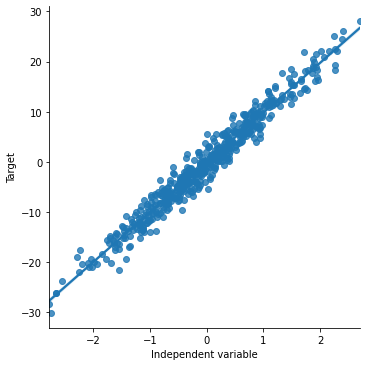

In [ ]:
sns.lmplot(x='x',y='y',data=demo_df,order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

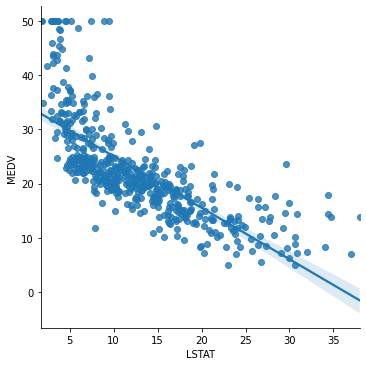

In [ ]:
sns.lmplot(x='LSTAT',y='MEDV',data=boston,order=1)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')
plt.show()

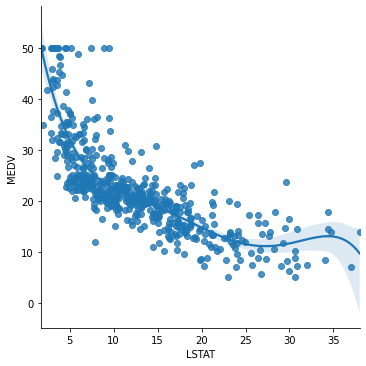

In [ ]:
sns.lmplot(x='LSTAT',y='MEDV',data=boston,order=5)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')
plt.show()

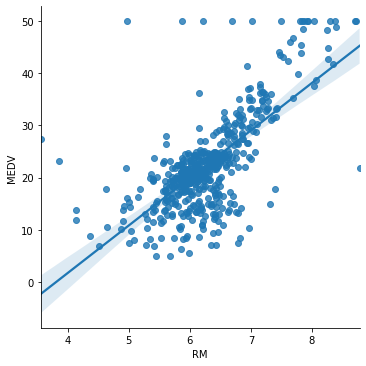

In [ ]:
sns.lmplot(x='RM',y='MEDV',data=boston,order=1)
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.show()

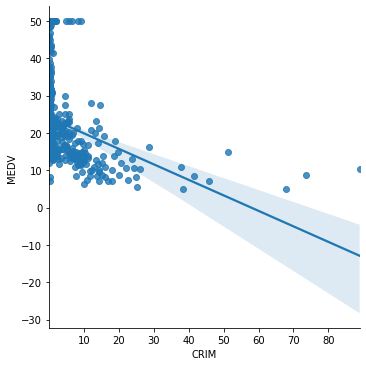

In [ ]:
sns.lmplot(x='CRIM',y='MEDV',data=boston,order=1)
plt.show()

# **Log Transformation**

In [ ]:
boston['log_crim']=np.log(boston['CRIM'])

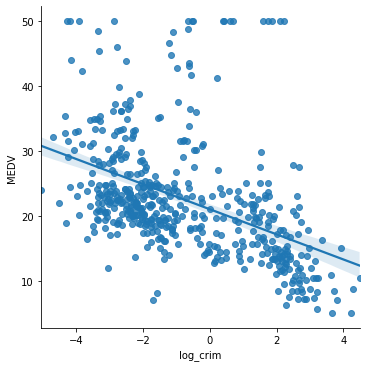

In [ ]:
sns.lmplot(x='log_crim',y='MEDV',data=boston,order=1)
plt.show()

In [ ]:
boston.drop(['log_crim'],axis=1,inplace=True)

# **Assesing Linear relationship by examining the residuals (errors)**

In [ ]:
demo_df.head()

,x,y
0,1.764052,14.375254
1,0.400157,0.866037
2,0.978738,7.429064
3,2.240893,25.011788
4,1.867558,20.466100


In [ ]:
demo_df[['x']]

,x
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558
...,...
501,-0.034242
502,1.096347
503,-0.234216
504,-0.347451


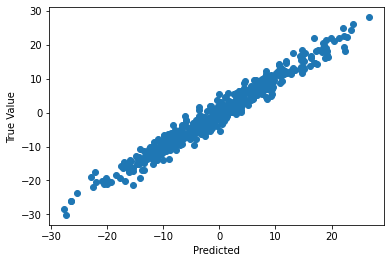

In [ ]:
reg=LinearRegression()
reg.fit(demo_df[['x']],demo_df[['y']])
pred=reg.predict(demo_df[['x']])
error=demo_df[['y']]-pred
plt.scatter(x=pred,y=demo_df['y'])
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

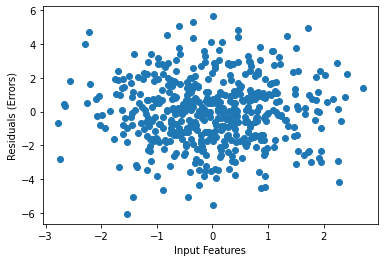

In [ ]:
plt.scatter(y=error,x=demo_df['x'])
plt.ylabel('Residuals (Errors)')
plt.xlabel('Input Features')
plt.show()

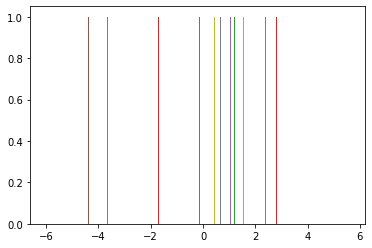

In [ ]:
plt.hist(error,bins=30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


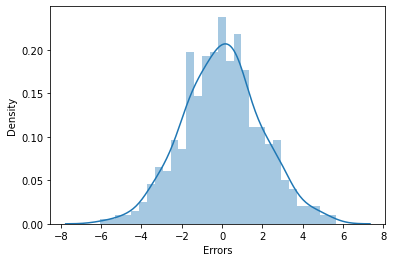

In [ ]:
sns.distplot(error,bins=30)
plt.xlabel('Errors')
plt.show()

# **Do it on Boston Dataset**

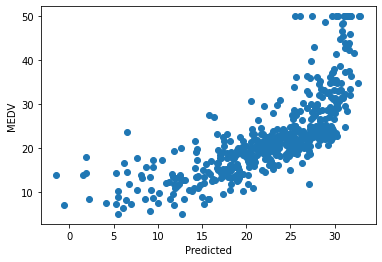

In [ ]:
reg=LinearRegression()
reg.fit(boston[['LSTAT']],boston[['MEDV']])
pred=reg.predict(boston[['LSTAT']])
error=boston[['MEDV']]-pred
plt.scatter(x=pred,y=boston[['MEDV']])
plt.xlabel('Predicted')
plt.ylabel('MEDV')
plt.show()

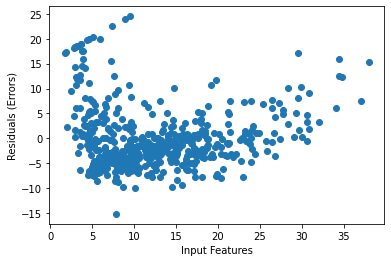

In [ ]:
plt.scatter(y=error,x=boston['LSTAT'])
plt.ylabel('Residuals (Errors)')
plt.xlabel('Input Features')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


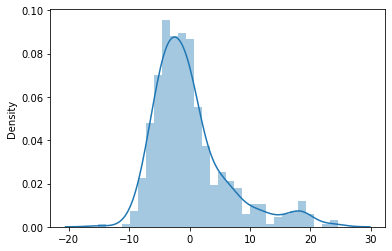

In [ ]:
sns.distplot(error,bins=30)

# **Log Transformer for LSTAT**

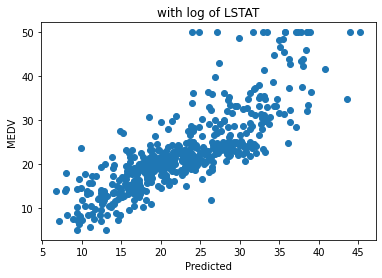

In [ ]:
reg=LinearRegression()
reg.fit(np.log(boston[['LSTAT']]),boston[['MEDV']])
pred=reg.predict(np.log(boston[['LSTAT']]))
error=boston[['MEDV']]-pred
plt.scatter(x=pred,y=boston[['MEDV']])
plt.xlabel('Predicted')
plt.ylabel('MEDV')
plt.title('with log of LSTAT')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


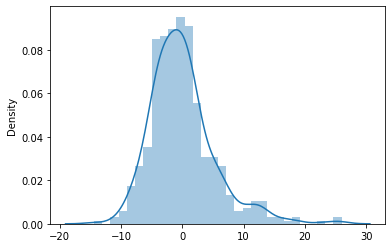

In [ ]:
sns.distplot(error,bins=30)

# **Multicolinearity**

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
corr_mat=boston[features].corr().round(2)

In [ ]:
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


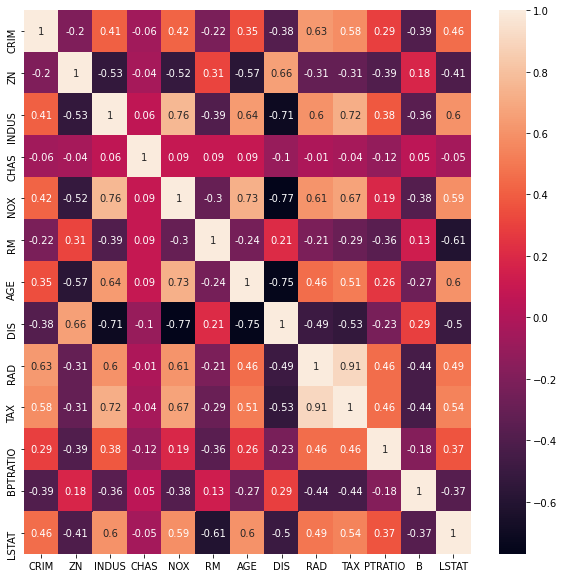

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(data=corr_mat,annot=True)

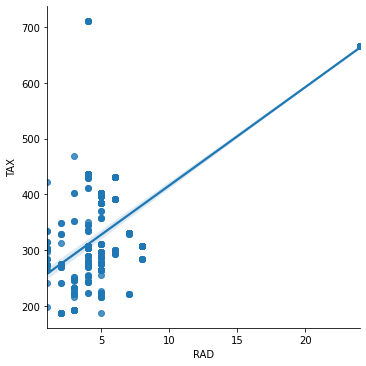

In [ ]:
sns.lmplot(x='RAD',y='TAX',data=boston,order=1)

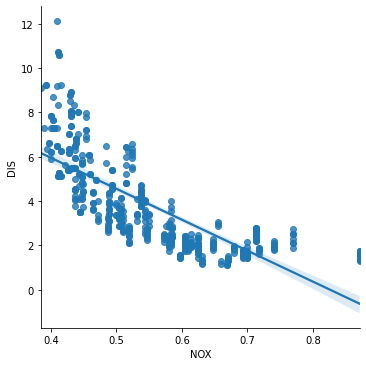

In [ ]:
sns.lmplot(x='NOX',y='DIS',data=boston,order=1)

# **Normality**
   **i) Histograms**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


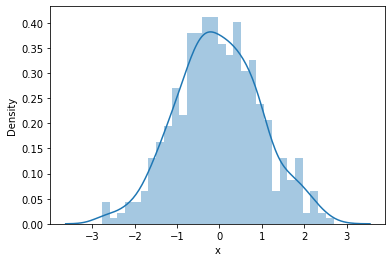

In [ ]:
sns.distplot(demo_df['x'],bins=30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


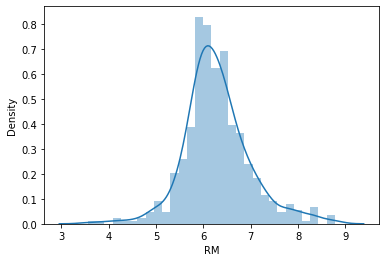

In [ ]:
#RM, LSTAT, CRIM
sns.distplot(boston['RM'],bins=30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


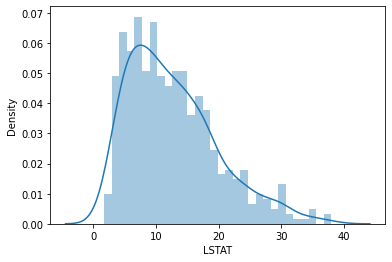

In [ ]:
sns.distplot(boston['LSTAT'],bins=30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


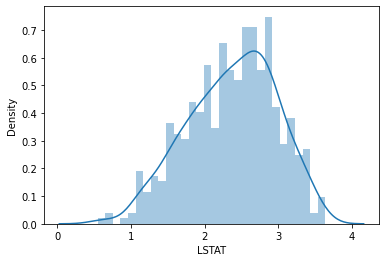

In [ ]:
sns.distplot(np.log(boston['LSTAT']),bins=30)

# **ii) Q-Q Plot**

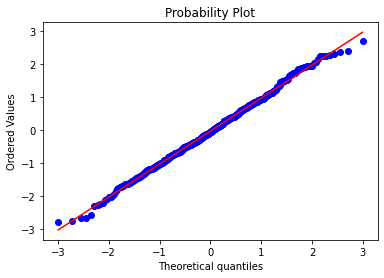

In [ ]:
stats.probplot(demo_df['x'],dist='norm',plot=plt)
plt.show()

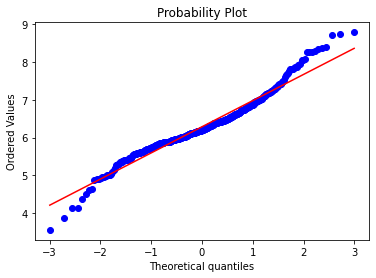

In [ ]:
stats.probplot(boston['RM'],dist='norm',plot=plt)
plt.show()

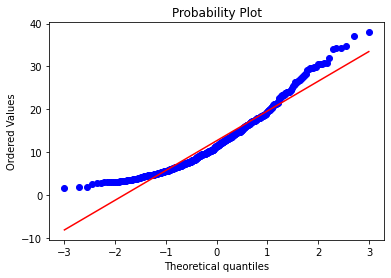

In [ ]:
stats.probplot(boston['LSTAT'],dist='norm',plot=plt)
plt.show()

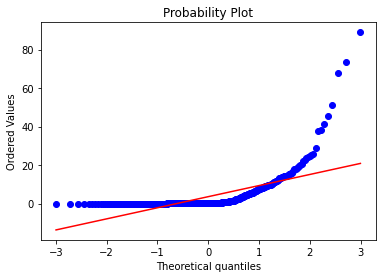

In [ ]:
stats.probplot(boston['CRIM'],dist='norm',plot=plt)
plt.show()

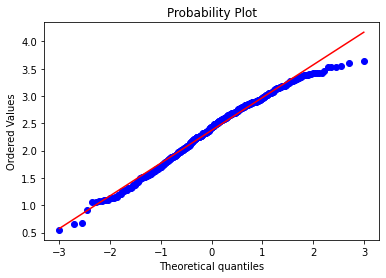

In [ ]:
stats.probplot(np.log(boston['LSTAT']),dist='norm',plot=plt)
plt.show()

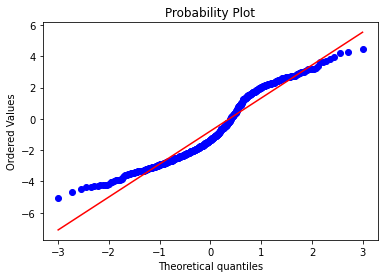

In [ ]:
stats.probplot(np.log(boston['CRIM']),dist='norm',plot=plt)
plt.show()

# **Homocedasticity**
  **i) Residual Plot**

  **ii) Levene's test**

  **iii) Barlett's test**

  **iv) Goldfeld-Quandt Test**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    boston[['RM','LSTAT','CRIM']],
    boston['MEDV'],test_size=0.3,random_state=0
    )

In [ ]:
x_train.shape,x_test.shape

((354, 3), (152, 3))

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.transform(x_train)

array([[-1.83936729,  3.10807269, -0.20735619],
       [ 0.32748658, -0.66643035, -0.38886492],
       [ 0.03790703,  0.63936662, -0.33573486],
       ...,
       [-0.41001405, -0.30284441, -0.38450355],
       [-0.39717555,  0.89967717, -0.37511786],
       [-1.05051266,  0.31822262, -0.38592298]])

In [ ]:
x_train.isnull().sum()

RM       0
LSTAT    0
CRIM     0
dtype: int64

In [ ]:
reg=LinearRegression()
reg.fit(scaler.transform(x_train),y_train)
print('Train dataset')
pred=reg.predict(scaler.transform(x_train))
print('Linear Regression mse:', mean_squared_error(y_train,pred))
print('Test dataset')
pred=reg.predict(scaler.transform(x_test))
print('Linear Regression mse:', mean_squared_error(y_test,pred))


Train dataset
Linear Regression mse: 28.603232128198893
Test dataset
Linear Regression mse: 33.20006295308442


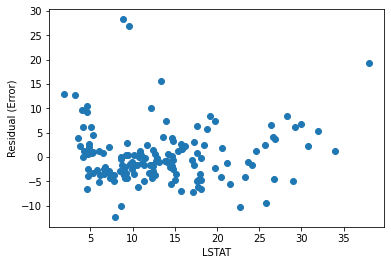

In [ ]:
error=y_test-pred
plt.scatter(x=x_test['LSTAT'],y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residual (Error)')
plt.show()

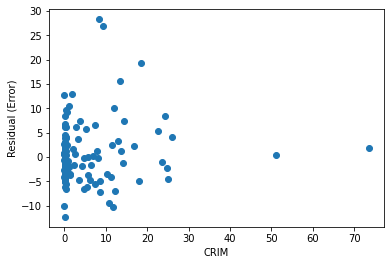

In [ ]:
error=y_test-pred
plt.scatter(x=x_test['CRIM'],y=error)
plt.xlabel('CRIM')
plt.ylabel('Residual (Error)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


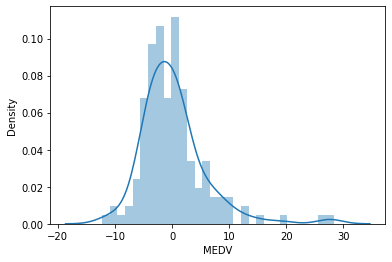

In [ ]:
sns.distplot(error,bins=30)

In [ ]:
 boston[['RM','LSTAT','CRIM']]

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [ ]:
np.log(boston[['RM','LSTAT','CRIM']])

,RM,LSTAT,CRIM
0,1.883275,1.605430,-5.064036
1,1.859574,2.212660,-3.600502
2,1.971996,1.393766,-3.601235
3,1.945624,1.078410,-3.430523
4,1.966693,1.673351,-2.672924
...,...,...,...
501,1.886008,2.269028,-2.770511
502,1.811562,2.206074,-3.095111
503,1.942476,1.729884,-2.800824
504,1.916040,1.868721,-2.211009


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    np.log(boston[['RM','LSTAT','CRIM']]),
    boston['MEDV'],test_size=0.3,random_state=0
    )
scaler=StandardScaler()
scaler.fit(x_train)
reg=LinearRegression()
reg.fit(scaler.transform(x_train),y_train)
print('Train dataset')
pred=reg.predict(scaler.transform(x_train))
print('Linear Regression mse:', mean_squared_error(y_train,pred))
print('Test dataset')
pred=reg.predict(scaler.transform(x_test))
print('Linear Regression mse:', mean_squared_error(y_test,pred))


Train dataset
Linear Regression mse: 24.368532328100965
Test dataset
Linear Regression mse: 29.516553315892253


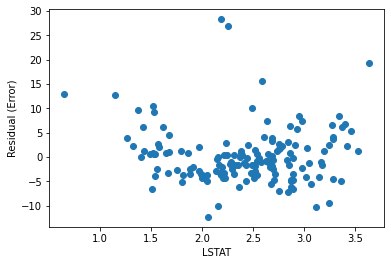

In [ ]:
plt.scatter(x=x_test['LSTAT'],y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residual (Error)')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


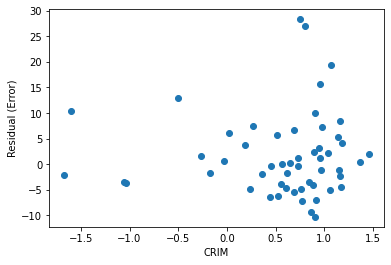

In [ ]:
plt.scatter(x=np.log(x_test['CRIM']),y=error)
plt.xlabel('CRIM')
plt.ylabel('Residual (Error)')
plt.show()